From slack:
P = 1.407939217 +/- 0.000000016 days
T0 = 2459038.4358981 +/- 0.00000114
b = 7.75 ± 0.01
a/R_s = 382.46121490392460 +/- 17.693977150029959

From Andrew's Paper
Rp = 10.4 +/- 1.0 Rearth
a = 0.0204 +/- 0.0012 au
Rwd = 0.0131 +/- 0.00054 Rsun, 1.429 +/- 0.059 Rearth
Teq = 163 +14 - 18

In [1]:
r_star = 0.0131 # solar radius
a_over_rstar = 382.5
semi_major = (a_over_rstar * r_star)*u.Rsun.to(u.au)
semi_major

0.02330232882786613

In [2]:
tint = np.array([200, 300, 400, 500, 600])
rfacv = np.array([0.5])
logmh = np.array([0,0.5,1,1.5])
cto = np.array([0.25,0.5,1,1.5])
Mp = np.array([1,2,4,8,12]) #Mjup

from myastrotools.reflectx import ConvertLogPlanetMHtoCKStr, ConvertCtoOtoStr
mhstr = np.array([ConvertLogPlanetMHtoCKStr(logmh[i]) for i in range(len(logmh))])
ctostr = np.array([ConvertCtoOtoStr(cto[i]) for i in range(len(cto))])
print(mhstr, ctostr)
print(len(tint)*len(rfacv)*len(logmh)*len(cto)*len(Mp))

Fsed = [0.1,0.3,0.5,0.7,1,2,6]
kzz = [1e7,1e9,1e11]
print(len(tint)*len(rfacv)*len(logmh)*len(cto)*len(Mp)*len(Fsed)*len(kzz))


['+000' '+050' '+100' '+150'] ['025' '050' '100' '150']
400
8400


From slack:
P = 1.407939217 +/- 0.000000016 days
T0 = 2459038.4358981 +/- 0.00000114
b = 7.75 ± 0.01
a/R_s = 382.46121490392460 +/- 17.693977150029959

From Andrew's Paper
Rp = 10.4 +/- 1.0 Rearth
a = 0.0204 +/- 0.0012 au
Rwd = 0.0131 +/- 0.00054 Rsun, 1.429 +/- 0.059 Rearth
Teq = 163 +14 - 18

noTiOVO	nstr_upper	nlevel	nofczns	nstr_deep	p_bottom	p_top	guess
TRUE	 87	         91	       1	  89	       2	-6	guillot_pt

In [3]:
out = pd.DataFrame()
from myastrotools.tools import update_progress
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(len(tint)):
    for j in range(len(rfacv)):
        for k in range(len(logmh)):
            for h in range(len(cto)):
                for m in range(len(Mp)):
                        dic = {'name':'WD1856b',
                               'output_dir':'/data2/lpearce/wd1856b',
                               'st_teff':'NA',
                               'rstar':0.0131,
                               'a/Rs':382.5,
                               'Teq':163,
                               'pl_mass':Mp[m], #Mjup
                               'pl_rad':10.4, # Rearth
                               'mh':logmh[k],
                               'mh_str':mhstr[k],
                               'cto':cto[h],
                               'ctostr':str(ctostr[h]),
                               'tint':tint[i],
                               'rfacv':rfacv[j],
                               'noTiVO':True,
                               'nstr_upper':87,
                               'nstr_deep':89,
                               'nlevel':91,
                               'nofczns':1,
                               'pbottom':2,
                               'ptop':-6,
                               'guess':'guillot',
                               'local_ck_path':'data/kcoeff_2020_v3'
                              }
                        count += 1
                        out = out.append(dic,ignore_index=True)
                        update_progress(count,len(tint)*len(rfacv)*len(logmh)*len(cto)*len(Mp))
out.to_csv('WD1856b-BaseModelGrid.csv', index=False)

100% (400 of 400): |####################|  Done...


In [21]:
out = pd.DataFrame()
from myastrotools.tools import update_progress
import warnings
warnings.filterwarnings('ignore')
wave_range = [[0.3,0.6],[0.6,6],[6,15]]
opas = ['/data2/picaso_dbs/all_opacities_0.3_1_R15000.db',
       '/data2/picaso_dbs/R60000/all_opacities_0.6_6_R60000.db',
       '/data2/picaso_dbs/R60000/all_opacities_4.8_15_R60000.db']
count = 0
for i in range(len(Fsed)):
    for j in range(len(kzz)):
        for k in range(len(opas)):
            dic = {'opa_file':opas[k],
                   'wave_range':wave_range[k],
                   'R':4000,
                   'fsed':Fsed[i],
                   'kzz':kzz[j]
                  }
            count += 1
            out = out.append(dic,ignore_index=True)
out.to_csv('WD1856b-CloudyGrid.csv', index=False)
out

,opa_file,wave_range,R,fsed,kzz
0,/data2/picaso_dbs/all_opacities_0.3_1_R15000.db,"[0.3, 0.6]",4000,0.1,1.000000e+07
1,/data2/picaso_dbs/R60000/all_opacities_0.6_6_R...,"[0.6, 6]",4000,0.1,1.000000e+07
2,/data2/picaso_dbs/R60000/all_opacities_4.8_15_...,"[6, 15]",4000,0.1,1.000000e+07
3,/data2/picaso_dbs/all_opacities_0.3_1_R15000.db,"[0.3, 0.6]",4000,0.1,1.000000e+09
4,/data2/picaso_dbs/R60000/all_opacities_0.6_6_R...,"[0.6, 6]",4000,0.1,1.000000e+09
...,...,...,...,...,...
58,/data2/picaso_dbs/R60000/all_opacities_0.6_6_R...,"[0.6, 6]",4000,6.0,1.000000e+09
59,/data2/picaso_dbs/R60000/all_opacities_4.8_15_...,"[6, 15]",4000,6.0,1.000000e+09
60,/data2/picaso_dbs/all_opacities_0.3_1_R15000.db,"[0.3, 0.6]",4000,6.0,1.000000e+11
61,/data2/picaso_dbs/R60000/all_opacities_0.6_6_R...,"[0.6, 6]",4000,6.0,1.000000e+11


In [1]:
import picaso.justdoit as jdi
import picaso.justplotit as jpi


def Run1Model(pl):
    ##### Load kcoeff opacities:
    planet_mh_str = pl['mh str']#'+1.0' #log metallicity
    planet_mh = float(pl['mh'])/100
    planet_cto = pl['cto']
    planet_mh_CtoO_str = str(planet_cto * 100).replace('.0','')
    if len(planet_mh_CtoO_str) < 3:
        planet_mh_CtoO_str = '0'+planet_mh_CtoO_str
    #planet_mh_CtoO_str = '100'#'1.0' # CtoO ratio

    noTiOVO = True
    local_ck_path = '/Volumes/Oy/picaso/reference/kcoeff_2020/'
    if noTiOVO:
        ck_db_name = local_ck_path + f'sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}_noTiOVO.data.196'
    else:
        ck_db_name = local_ck_path + f'sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
    #ck_db = f'/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh{planet_mh_str}_co_{planet_mh_CtoO_str}.data.196'
    opacity_ck = jdi.opannection(ck_db=ck_db_name, wave_range = [0.4,10]) # grab your opacities


    star_filename = 'bestfit-JWST-flam-Ang-um-forpicaso.txt'

    ### Initialize:
    wd = jdi.inputs(calculation="planet", climate = True) # start a calculation
    wd.phase_angle(0)

    ### Star:
    # Select star radius from normal distribution:
    star_radius = pl['rstar']
    sma = (pl['a/Rs'] * star_radius)*u.Rsun.to(u.au)

    # pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
    wd.star(opacity_ck, temp=None, metal=None, logg=None ,radius = star_radius, radius_unit=u.Rsun,
             semi_major=sma, semi_major_unit = u.au, filename=star_filename, w_unit='um', f_unit='FLAM')


    ### Planet details:
    planet_radius = pl['pl_rad'] # Rearth
    planet_mass = pl['pl_mass'] # Mearth

    wd.gravity(mass=planet_mass, mass_unit=jdi.u.Unit('M_earth'),
                  radius=planet_radius, radius_unit=jdi.u.Unit('R_earth'))
    Tint = 200
    wd.effective_temp(Tint)

    Teq = pl['Teq']
    # Compute climate:

    nlevel = 91
    pbottom = 2
    ptop = -6
    pt = wd.guillot_pt(Teq, nlevel=nlevel, T_int = Tint,
                       p_bottom=pbottom, p_top=ptop)
    nstr_upper = 85
    nstr_deep = 89
    nofczns = 1
    rfacv = 0.5

    # initial PT profile guess:
    temp_guess = pt['temperature'].values 
    press_guess = pt['pressure'].values
    # Input climate params:
    nstr = np.array([0,nstr_upper, nstr_deep,0,0,0]) # initial guess of convective zones
    # Set up climate run inputs:
    wd.inputs_climate(temp_guess= temp_guess, pressure= press_guess, 
                  nstr = nstr, nofczns = nofczns , rfacv = rfacv)
    # Compute climate:
    noclouds = wd.climate(opacity_ck, save_all_profiles=True, with_spec=True)
    return wd, noclouds

p = pd.read_csv('WD1856b-BaseModelGrid.csv',dtype={ 'mh_str':np.str_ ,'ctostr':np.str_})
i = 1
pl = p.loc[i]
wd, noclouds = Run1Model(pl)

NOTE: You are loading Opacity tables without any Gaseous TiO and VO opacities


/Users/loganpearce/Dropbox/astro_packages/Others-Packages/picaso/picaso/justdoit.py:3797: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'nostar' in self.inputs['star'].values():


Iteration number  0 , min , max temp  179.53978155434524 1996.5843944431494 , flux balance  3.9506266840511
Iteration number  1 , min , max temp  151.94611751957734 2124.707192018774 , flux balance  0.9648522778260057
Iteration number  2 , min , max temp  141.30784566682468 2106.6495401094917 , flux balance  0.1485990372671048
Iteration number  3 , min , max temp  140.77666746569832 2106.2054902126724 , flux balance  0.007659916481517498
Iteration number  4 , min , max temp  140.80975340753017 2106.205117789826 , flux balance  3.575494208203456e-05
In t_start: Converged Solution in iterations  4
Big iteration is  140.80975340753017 0
Iteration number  0 , min , max temp  158.48477407853125 2118.8694678845495 , flux balance  0.3795793023379873
Iteration number  1 , min , max temp  161.56157490527931 2125.495742796563 , flux balance  0.03326329817328143
Iteration number  2 , min , max temp  161.3653738724184 2125.4414738514274 , flux balance  0.0003912155375012288
Iteration number  3 , m

Big iteration is  158.0867744760189 0
Iteration number  0 , min , max temp  158.08711176474765 2091.9306885812853 , flux balance  2.9742033672240638e-08
In t_start: Converged Solution in iterations  0
Profile converged
[ 0 69 81 81 85 89]
Iteration number  0 , min , max temp  158.08717353256398 2080.3755076003117 , flux balance  1.7918807432981472e-08
In t_start: Converged Solution in iterations  0
Big iteration is  158.08717353256398 0
Iteration number  0 , min , max temp  158.08700449303748 2079.713212114999 , flux balance  3.962269413671142e-09
In t_start: Converged Solution in iterations  0
Profile converged
[ 0 69 82 82 85 89]
Iteration number  0 , min , max temp  158.0870575273201 2064.1012950982245 , flux balance  1.5422565439825203e-09
In t_start: Converged Solution in iterations  0
Big iteration is  158.0870575273201 0
Iteration number  0 , min , max temp  158.08705680979833 2063.7465918526377 , flux balance  5.851020544027836e-10
In t_start: Converged Solution in iterations  

Iteration number  0 , min , max temp  160.62436318246753 1675.4850731187912 , flux balance  3.929969815726181e-05
Iteration number  1 , min , max temp  160.6269939703536 1675.4444964962959 , flux balance  2.6313571084542826e-06
In t_start: Converged Solution in iterations  1
Profile converged
[ 0 56 89  0 85 89]
Iteration number  0 , min , max temp  160.64982536075271 1661.55672435367 , flux balance  0.0025145292681878553
Iteration number  1 , min , max temp  160.65079064052358 1660.8302078279737 , flux balance  6.639408895004269e-05
In t_start: Converged Solution in iterations  1
Big iteration is  160.65079064052358 0
Iteration number  0 , min , max temp  160.75806356451855 1669.6109701508412 , flux balance  -0.0003255591268243531
Iteration number  1 , min , max temp  160.76134989284128 1669.676298021957 , flux balance  -5.5396911119965835e-06
In t_start: Converged Solution in iterations  1
Profile converged
[ 0 55 89  0 85 89]
Iteration number  0 , min , max temp  160.71817821977402 

<IPython.core.display.Javascript object>


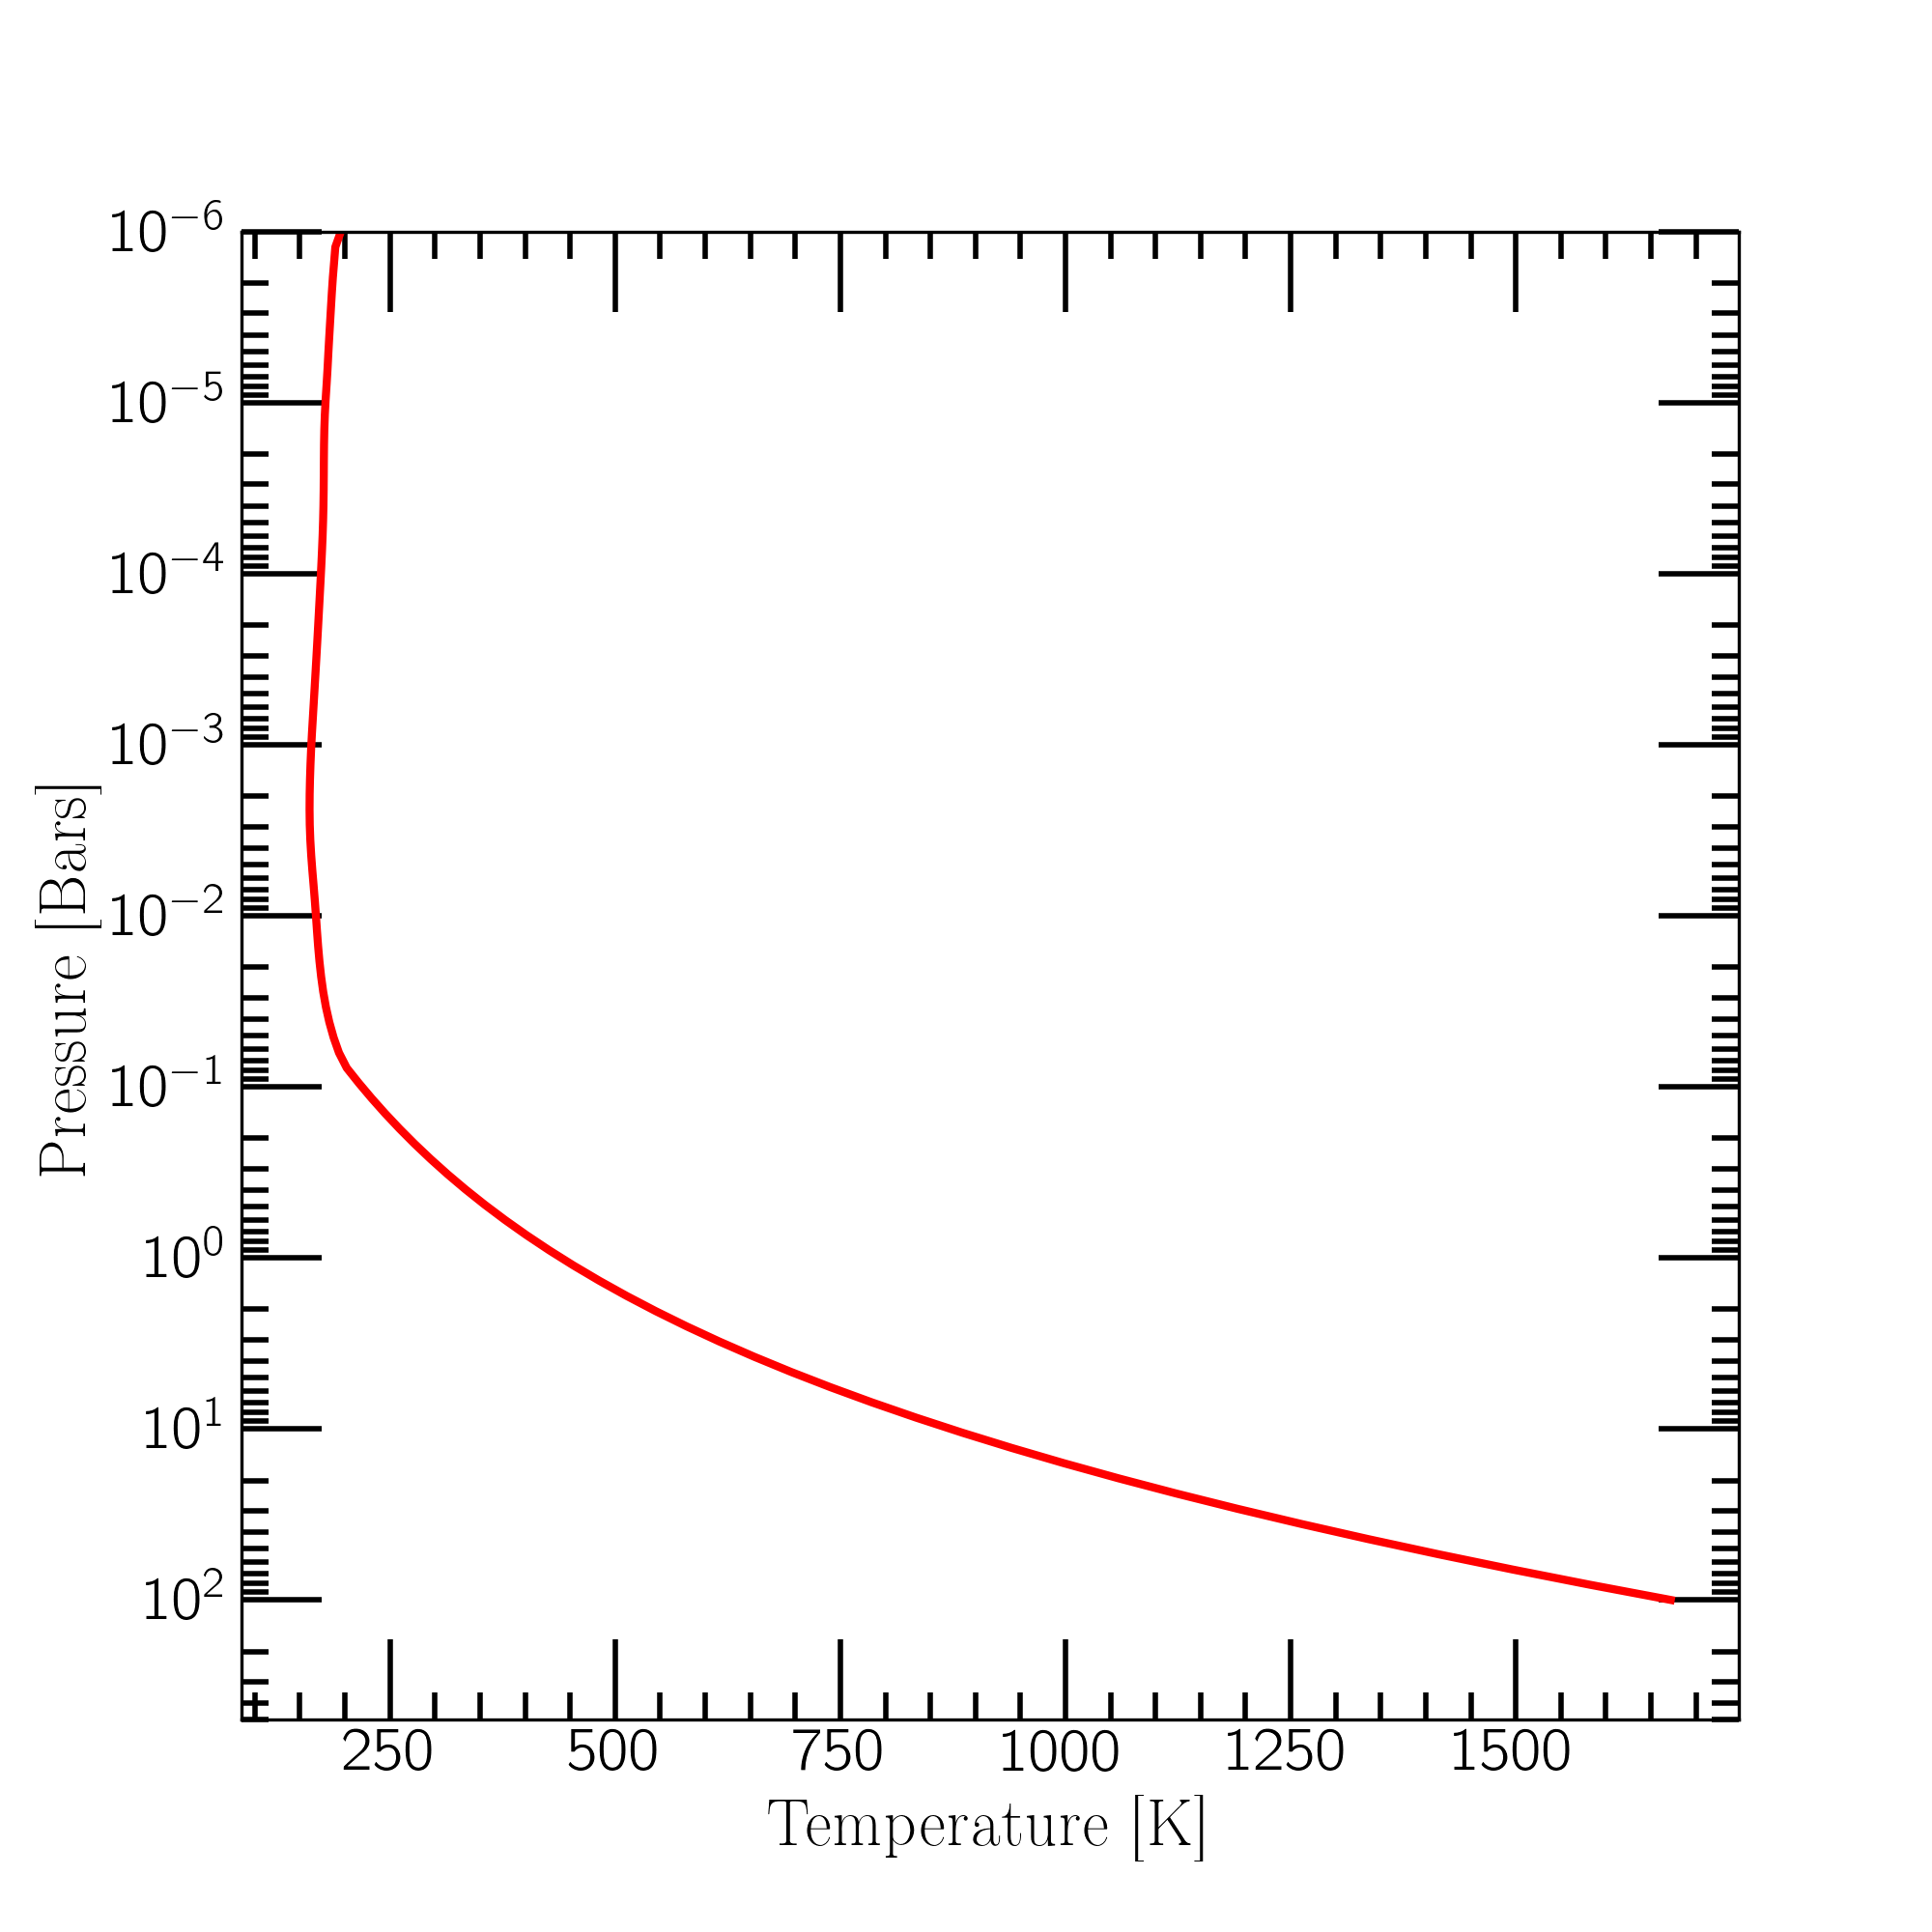

In [19]:
from myastrotools.reflectx import MakePTProflePlot
fig = MakePTProflePlot(noclouds['ptchem_df'])

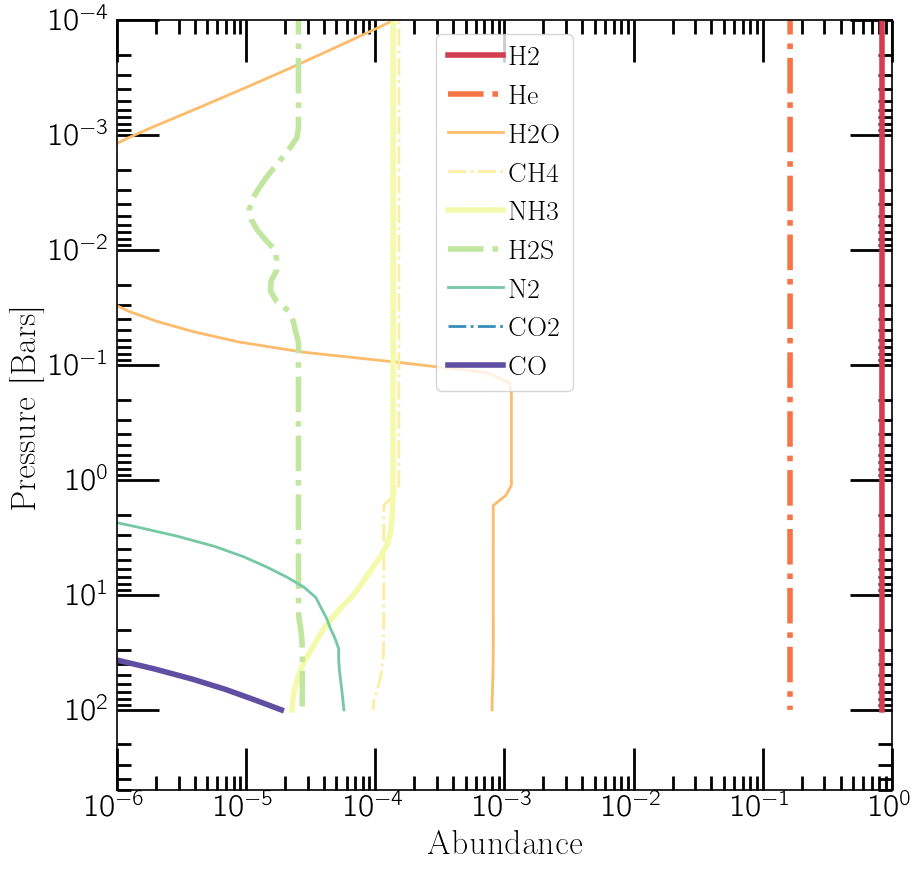

In [2]:
# import picaso.justplotit as jpi
# mrp = jpi.mixing_ratio(full_output, plot_height=900, plot_width=600)
# # Save mixing ratio plot for future inspection
# from bokeh.plotting import output_file, save, show
# #output_file(savefiledirectory+"-mixing-ratios.html")
# show(mrp)
n_mols_to_plot = 8

atm_df = noclouds['ptchem_df']
    #if AbundancesPlot:
sort = np.argsort(atm_df.loc[0])[::-1]
highest_abundance = np.array(atm_df.keys()[sort])
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='temperature'))
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='pressure'))
highest_abundance = np.delete(highest_abundance,np.where(highest_abundance=='e-'))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
mols = highest_abundance[:n_mols_to_plot+1]
linestyles = ['-','-.']*len(mols)
lineweights = [4,4,2,2]*len(mols)
n = len(mols)
cs = np.linspace(0.1,1,n)
colors = cmap(cs)
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Abundance', fontsize=25)
plt.ylim(500,1e-4)
plt.xlim(left=1e-6)

for i,mol in enumerate(mols):
    plt.plot(atm_df[mol],
            atm_df['pressure'],
            color=colors[i],linewidth=lineweights[i],label=mol,ls=linestyles[i])
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
#plt.gca().invert_yaxis()
plt.legend(fontsize=20)
# plt.savefig(savefiledirectory+'-abundances.png',
#             bbox_inches='tight')

In [ ]:
opa = jdi.opannection(wave_range=[0.3,2])

In [9]:
spec = jdi.inputs(calculation='planet')
spec.phase_angle(0)
### Star:
# Select star radius from normal distribution:
star_radius = pl['rstar']
sma = (pl['a/Rs'] * star_radius)*u.Rsun.to(u.au)

star_filename = 'bestfit-JWST-flam-Ang-um-forpicaso.txt'
# pysynphot FLAM units are ergs/cm2/s/Ang https://pysynphot.readthedocs.io/en/latest/units.html
spec.star(opa, temp=None, metal=None, logg=None ,radius = star_radius, radius_unit=u.Rsun,
         semi_major=sma, semi_major_unit = u.au, filename=star_filename, w_unit='um', f_unit='FLAM')

### Planet details:
planet_radius = pl['pl_rad'] # Rearth
planet_mass = pl['pl_mass'] # Mearth

spec.gravity(mass=planet_mass, mass_unit=jdi.u.Unit('M_earth'),
              radius=planet_radius, radius_unit=jdi.u.Unit('R_earth'))
spec.atmosphere(df=atm_df)

df = spec.spectrum(opa, full_output=True) #note the new last key
wno, alb, full_output = df['wavenumber'] , df['albedo'] , df['full_output']
jpi.output_notebook()
jpi.show(jpi.mixing_ratio(full_output, plot_height=900, plot_width=600))

Loading BokehJS ...